In [1]:
# importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df.head(0)

Empty DataFrame
Columns: [job_title_short, job_title, job_location, job_via, job_schedule_type, job_work_from_home, search_location, job_posted_date, job_no_degree_mention, job_health_insurance, job_country, salary_rate, salary_year_avg, salary_hour_avg, company_name, job_skills, job_type_skills]
Index: []

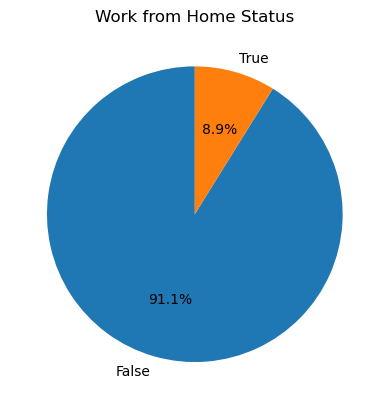

In [18]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

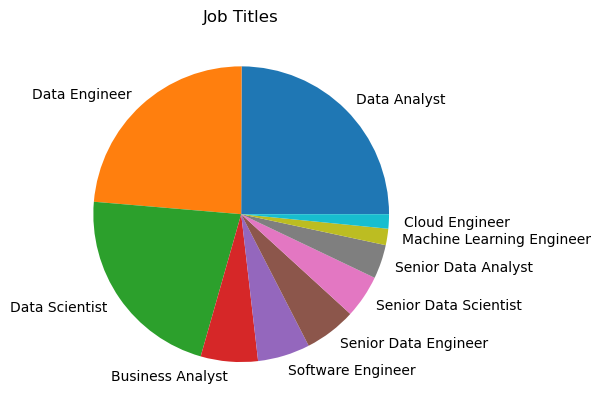

In [8]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title('Job Titles')
plt.ylabel('')
plt.show()

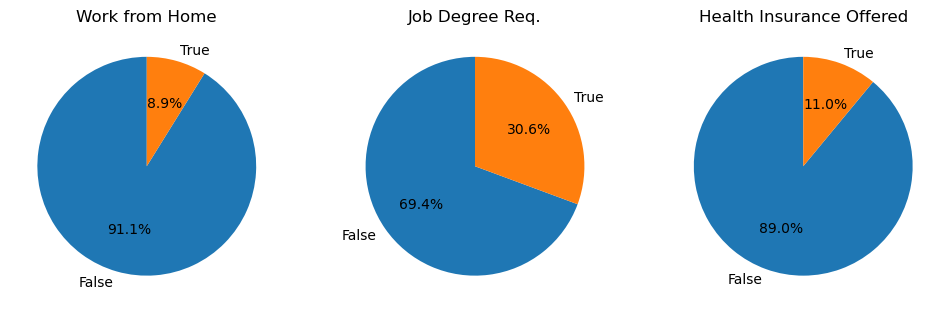

In [21]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12, 5)
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, labels=['False', 'True'], autopct='%1.1f%%')
    ax[i].set_title(title)

plt.show()